# Topo vs. PFlow comparison

So for the retraining campaign we're switching over to PFlow jets, but I was curious if this affected us at all, so I'm comparing a ttbar training and evaluation for EMTopo vs. PFlow.

Dec 2018

In [2]:
import numpy as np
import h5py
import sys
import pandas as pd
import xarray as xr

sys.path.append("../..")
from usefulFcts import *
from trainNet import *
from plottingFcts import *

# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

Using TensorFlow backend.


In [3]:
vStr = "sd0_sz0_nNextToInnHits_nInnHits_nsharedBLHits_nsplitBLHits_nsharedPixHits_nsplitPixHits_nsharedSCTHits_logNorm_ptfrac_dr_norm_nPixHits_nSCTHits"

leffs, ceffs, beffs = [],[],[]

jetCollections = ['Topo','PFlow']

Initialize method from myModel()
Loading previously trained LSTM
acc
loss
val_acc
val_loss


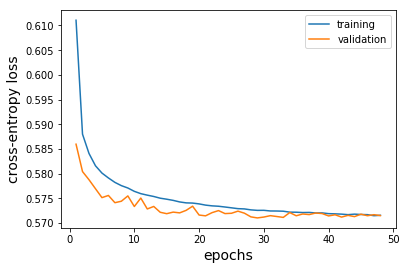

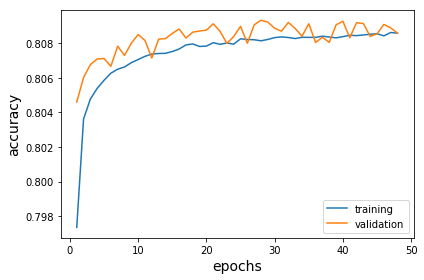

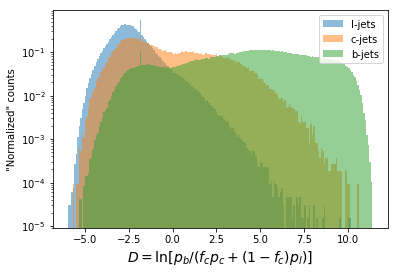

Initialize method from myModel()
Loading previously trained LSTM
acc
loss
val_acc
val_loss


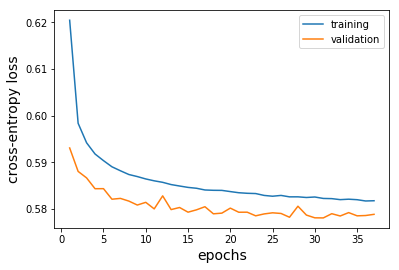

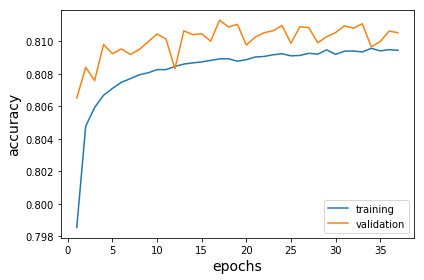

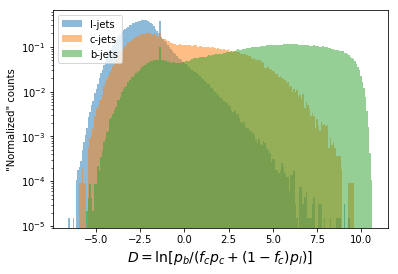

In [5]:
figDir = '../../figures/'

for jetCollection in jetCollections:
    
    # Step 1: Open the file
    subDir = 'mc16d_{}_ttbar'.format(jetCollection)
    dataDir = '../../data/'+subDir
    dataTagTest = "2mtest_15trks_{}_sd0_rev".format(vStr)
    dataTagTrain = "3mtrain_15trks_{}_sd0_rev".format(vStr)
    
    f_name = "{}/data_{}.hdf5".format(dataDir,dataTagTest)

    f = h5py.File(f_name,"r")

    X = f['X_test'][:]
    y = f['y_test'][:]
    ix = f['ix_test'][:]

    f.close()
    
    # Step 2: Get the model
    modelDir = '../../models/'+subDir
    nFeatures = X.shape[-1]
    m = myLSTM(modelDir=modelDir, nFeatures=nFeatures, dataTag=dataTagTrain, loadModel=True)
    trainingMetrics(m.modelName,modelDir=modelDir)
    
    # Step 3: Get the discriminant
    leff, ceff, beff = sigBkgEff(m, X, y, ix,figDir=figDir,subDir=subDir,tag='hybrid 1.5 training')

    leffs.append(leff)
    ceffs.append(ceff)
    beffs.append(beff)

../../plottingFcts.py:456: RuntimeWarning: divide by zero encountered in true_divide
  plt.semilogy(teff, np.divide(1,beff), style, color=color, label=label)


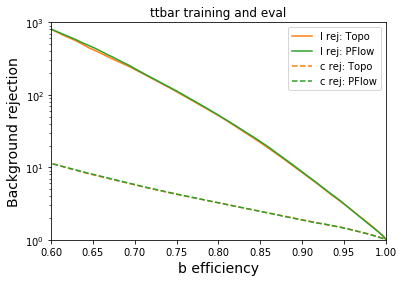

In [6]:
btagROC(beffs, leffs, ceffs, jetCollections,
        title='ttbar training and eval',colors=['C1','C2'])

In [7]:
text="$\mathbf{ATLAS}$ Simulation Internal\n"
text+=r"$\sqrt{s}$ = 13 TeV, mc16d $t\bar{t}$"

In [8]:
labels = ['{}: train + eval'.format(j) for j in jetCollections]

In [9]:
nTest = X.shape[0]
colors = ['C1','C2']

../../plottingFcts.py:479: RuntimeWarning: invalid value encountered in sqrt
  eff_err = lambda x, N: np.sqrt( x*(1-x) / N)
/gpfs/slac/atlas/fs1/d/nhartman/miniconda3/envs/py3_tf/lib/python3.6/site-packages/scipy/interpolate/_cubic.py:147: RuntimeWarning: divide by zero encountered in true_divide
  mk = (y[1:] - y[:-1]) / hk
/gpfs/slac/atlas/fs1/d/nhartman/miniconda3/envs/py3_tf/lib/python3.6/site-packages/scipy/interpolate/_cubic.py:165: RuntimeWarning: invalid value encountered in true_divide
  whmean = (w1/mk[:-1] + w2/mk[1:]) / (w1 + w2)
/gpfs/slac/atlas/fs1/d/nhartman/miniconda3/envs/py3_tf/lib/python3.6/site-packages/scipy/interpolate/_cubic.py:117: RuntimeWarning: invalid value encountered in multiply
  d = ((2*h0 + h1)*m0 - h0*m1) / (h0 + h1)
/gpfs/slac/atlas/fs1/d/nhartman/miniconda3/envs/py3_tf/lib/python3.6/site-packages/scipy/interpolate/_cubic.py:147: RuntimeWarning: invalid value encountered in true_divide
  mk = (y[1:] - y[:-1]) / hk


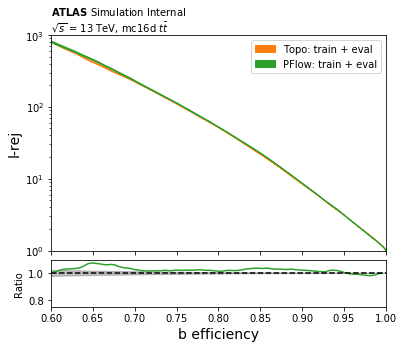

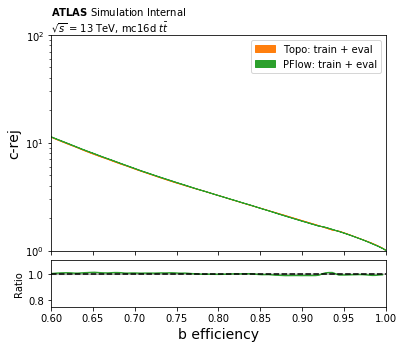

In [10]:
subDir = 'mc16d_PFlow_ttbar'

plotROCRatio(beffs, leffs, labels, rrange=(0.75,1.1),
             text=text,ylabel='l-rej',binomialErrors=True,nTest=nTest, 
             colors=colors,figDir=figDir,subDir=subDir,
             tag='lrej_cf_Topo')

plotROCRatio(beffs, ceffs, labels, rrange=(0.75,1.11),ymax=100,
             text=text,ylabel='c-rej',binomialErrors=True,nTest=nTest, 
             colors=colors,figDir=figDir,subDir=subDir,
             tag='crej_cf_Topo')

It might be useful to compare the performance w/r.t. $p_T$ for the two jet collections, b/c we expect any gains from pflow to help at low $p_T$!

**Lesson:** For my algs update on Dec $13^{th}$ 2018, I saw *worse* performance on the pflow jets.  But when I loosened the JVT cut from 0.59 -> 0.2 (according to the current Jet/ETmiss [R21 recommendations](https://twiki.cern.ch/twiki/bin/viewauth/AtlasProtected/JVTCalibrationRel21)